In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [4]:
train = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/Data/Train',
    labels = "inferred",
    label_mode = "binary",
    class_names = None,
    color_mode = "rgb",
    batch_size = 494,
    image_size = (150, 150),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 494 files belonging to 2 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
for images, labels in train.take(1) :
    x_train = images.numpy()
    y_train = labels.numpy()[:, 0].astype('uint8')

In [6]:
test = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/Data/Test',
    labels = "inferred",
    label_mode = "binary",
    class_names = None,
    color_mode = "rgb",
    batch_size = 200,
    image_size = (150, 150),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 200 files belonging to 2 classes.


In [7]:
for images, labels in test.take(1) :
    x_test = images.numpy()/255.0
    y_test = labels.numpy()[:,0].astype('uint8')

In [8]:
val = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/Data/Validation',
    labels = "inferred",
    label_mode = "binary",
    class_names = None,
    color_mode = "rgb",
    batch_size = 200,
    image_size = (150, 150),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 200 files belonging to 2 classes.


In [9]:
for images, labels in val.take(1) :
    x_val = images.numpy()/255.0
    y_val = labels.numpy()[:, 0].astype('uint8')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,)
train_generator = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/Data/Train', batch_size = 494, target_size=(150, 150), class_mode='binary')


Found 494 images belonging to 2 classes.


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [36]:
from tensorflow.keras import layers
model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())  # Ajouter la couche Flatten ici
model.add(layers.Dense(units=150, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')

history = model.fit(train_generator, epochs=100, validation_data = (x_val, y_val), batch_size = 494)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 3.2761 - accuracy: 0.5870 - val_loss: 1.3538 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 5s 5s/step - loss: 13.0903 - accuracy: 0.5810 - val_loss: 1.2641 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 13.2592 - accuracy: 0.5486 - val_loss: 0.8127 - val_accuracy: 0.5150
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 4.2433 - accuracy: 0.7126 - val_loss: 0.5626 - val_accuracy: 0.6950
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 2.2237 - accuracy: 0.8057 - val_loss: 0.6250 - val_accuracy: 0.6050
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 3.4994 - accuracy: 0.7227 - val_loss: 0.6254 - val_accuracy: 0.5850
Epoch 7/100
1/1 [==============================] - 5s 5s/step - loss: 3.2507 - accuracy: 0.7126 - val_loss: 0.6009 - val_accuracy: 0.6450
Epoch 8/100
1/1 [===============

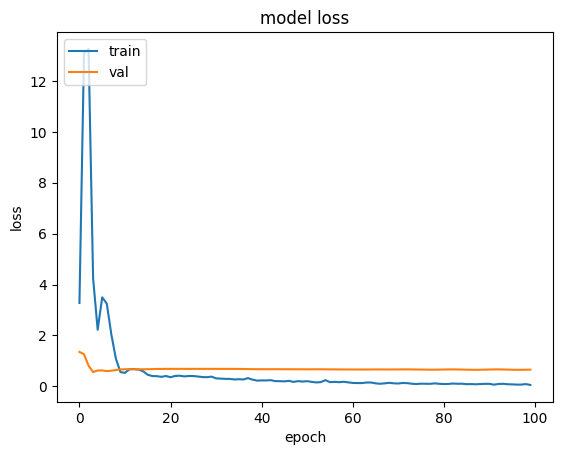

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

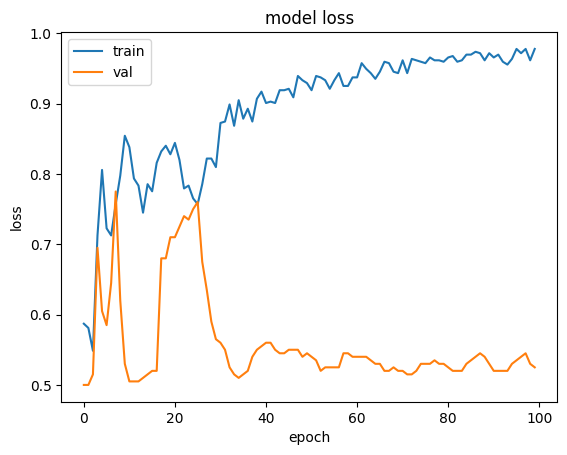

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
pred_test = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 62ms/step - loss: 0.6703 - accuracy: 0.5400


In [41]:
y_pred_train = (model.predict(x_train) > 0.5).astype("int32")
y_pred_val = (model.predict(x_val) > 0.5).astype("int32")
y_pred_test = (model.predict(x_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 65ms/step


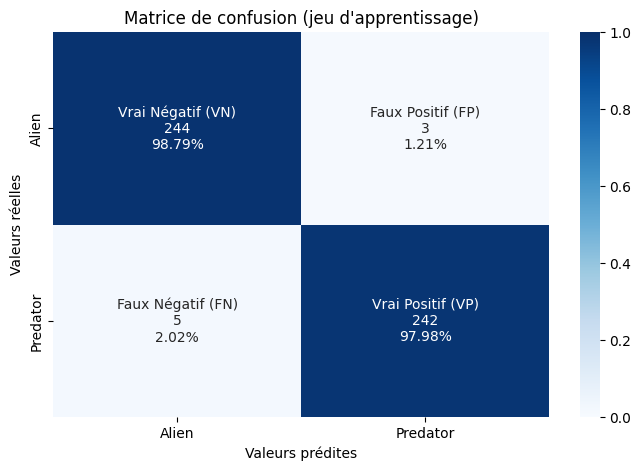

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train, normalize='true')

names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_train, y_pred_train, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_pred_train, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (jeu d'apprentissage)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Alien', 'Predator'],
            yticklabels=['Alien', 'Predator'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

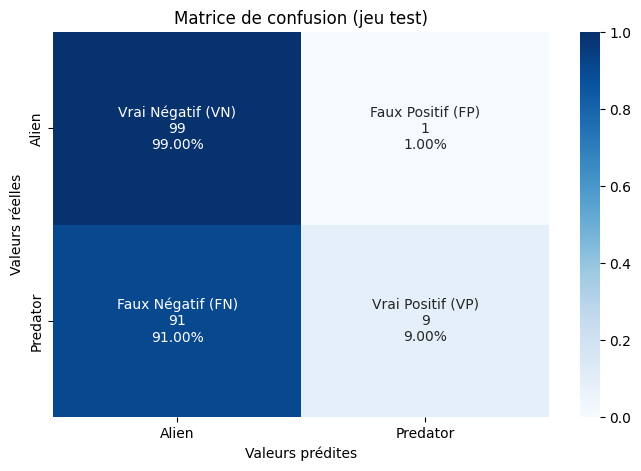

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test, normalize='true')

names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_pred_test, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_pred_test, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (jeu test)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Alien', 'Predator'],
            yticklabels=['Alien', 'Predator'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

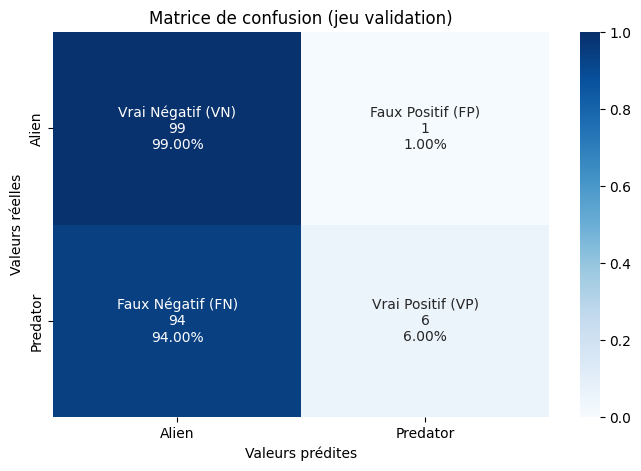

In [44]:
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_val, normalize='true')

names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_val, y_pred_val, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_val, y_pred_val, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (jeu validation)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Alien', 'Predator'],
            yticklabels=['Alien', 'Predator'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()